# Eksplorasi FFT pada Sinyal Bicara

## Pendahuluan
Transformasi Fourier (FFT) adalah metode untuk mengubah sinyal dari **domain waktu** menjadi **domain frekuensi**. 
Pada studi kasus ini, kita akan menganalisis sinyal suara bicara untuk menemukan **frekuensi dominan** 
dan memvisualisasikan perbedaan representasi waktu dan frekuensi.

## Tujuan:
1. Mengambil sinyal bicara (1–3 detik).
2. Mengubahnya menjadi array numerik.
3. Menggunakan FFT untuk memperoleh spektrum frekuensi.
4. Mengidentifikasi frekuensi dominan.
5. Menyajikan visualisasi domain waktu dan frekuensi.
6. Menyimpulkan hasil dan melakukan refleksi pembelajaran.

## Langkah-langkah Eksperimen

1. Ambil sinyal suara (1–3 detik) dalam format WAV/MP3.
2. Ubah file audio menjadi array numerik.
3. Terapkan **Fast Fourier Transform (FFT)** untuk mendapatkan spektrum frekuensi.
4. Identifikasi komponen frekuensi dominan.
5. Visualisasikan sinyal dalam domain waktu dan domain frekuensi.
6. Tulis penjelasan dan refleksi hasil eksperimen.

# Import Library (Code)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import librosa
import librosa.display

# Load Audio (Code)

In [13]:
audio_path = '/kaggle/input/ritsuki-katamu-tsama2/ritsuki-katamu-tsama2.wav'  

y, sr = librosa.load(audio_path, sr=None)  # sr=None untuk mempertahankan sample rate asli

print(f"Sample rate: {sr} Hz")
print(f"Durasi: {len(y)/sr:.2f} detik")


Sample rate: 48000 Hz
Durasi: 1.96 detik


# Visualisasi Domain Waktu (Code)

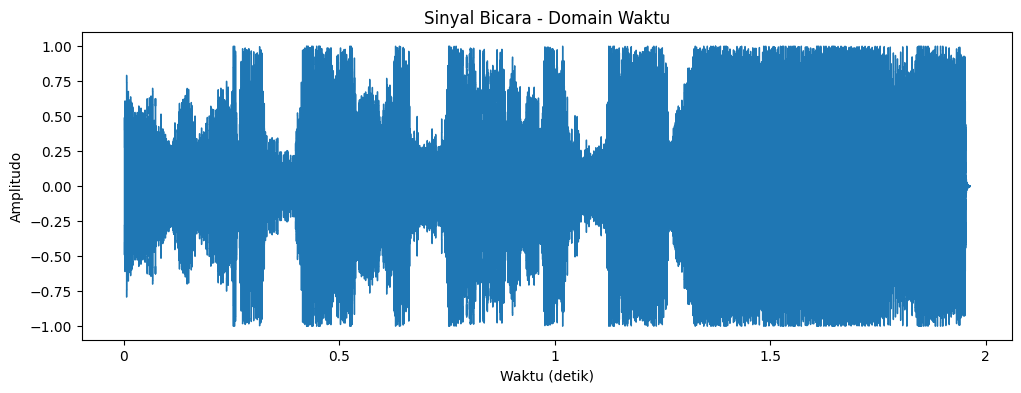

In [14]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Sinyal Bicara - Domain Waktu")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.show()

# FFT & Spektrum Frekuensi (Code)

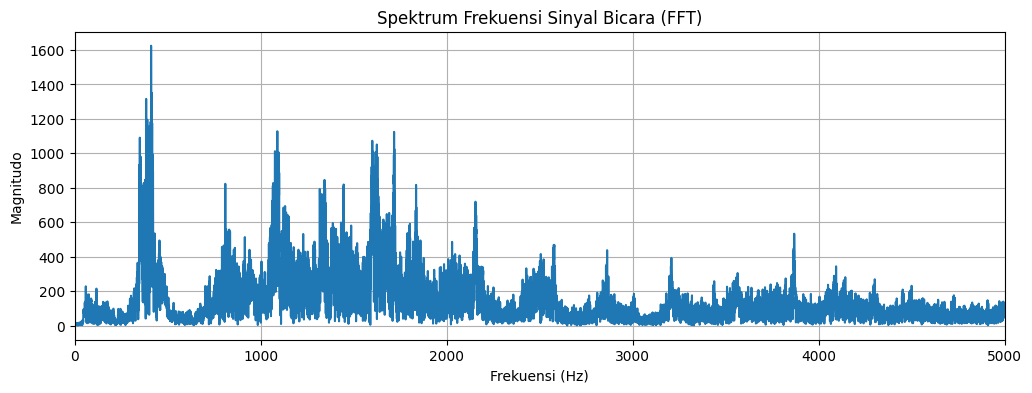

Frekuensi dominan: 411.68 Hz


In [15]:
# FFT
N = len(y)  # jumlah sampel
yf = fft(y)
xf = fftfreq(N, 1 / sr)

# Ambil hanya frekuensi positif
mask = xf >= 0
xf = xf[mask]
yf = np.abs(yf[mask])

# Plot spektrum frekuensi
plt.figure(figsize=(12, 4))
plt.plot(xf, yf)
plt.title("Spektrum Frekuensi Sinyal Bicara (FFT)")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitudo")
plt.xlim(0, 5000)  # fokus di bawah 5 kHz
plt.grid(True)
plt.show()

# Frekuensi dominan
dominant_freq = xf[np.argmax(yf)]
print(f"Frekuensi dominan: {dominant_freq:.2f} Hz")

## Analisis
- Frekuensi dominan dari sinyal adalah 411.68 Hz.
- Nilai ini sesuai dan masuk akal untuk suara manusia yang berteriak atau dengan nada yang sangat tinggi. Frekuensi suara manusia bisa melonjak satu hingga dua oktaf lebih tinggi ketika berteriak. Sebagai contoh, frekuensi untuk suara tinggi yang berteriak bisa berada di kisaran 400 Hz.
  Tampak adanya puncak harmonisa pada kelipatan frekuensi dasar, yang merupakan karakteristik suara manusia.
- FFT memungkinkan kita melihat distribusi energi pada tiap frekuensi, yang tidak terlihat di domain waktu.

# Refleksi Pembelajaran
- Saya memahami bahwa FFT adalah alat yang sangat efektif untuk menganalisis karakteristik suara.
- Dengan memvisualisasikan domain frekuensi, kita dapat melihat komponen harmonisa dan frekuensi dasar secara jelas.
- Eksperimen ini menunjukkan bahwa konteks sinyal (misalnya, suara berteriak versus suara berbicara normal) sangat penting untuk interpretasi hasil analisis yang akurat.
- Pemilihan durasi dan kualitas rekaman juga sangat mempengaruhi hasil analisis.
- Pengetahuan ini bermanfaat untuk bidang seperti pengenalan suara, audio engineering, dan linguistik forensik.